In [12]:
from tensorflow import keras
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
model =  keras.models.load_model('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2-files/')

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [15]:
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
layer_name = 'conv2d_11' 

# This instance constructs new model whose output is replaced to `conv2d_11` layer's output.
extract_intermediate_layer = ExtractIntermediateLayer(index_or_name=layer_name)
# This instance modify the model's last activation function to linear one.
replace2linear = ReplaceToLinear()

# Instead of using ExtractIntermediateLayer and ReplaceToLinear instance,
# you can also define the function from scratch as follows:
def model_modifier_function(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    target_layer.activation = tf.keras.activations.linear
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    return new_model

In [17]:
from tf_keras_vis.utils.scores import CategoricalScore

score = []
for filter_number in range (10):
    score.append(CategoricalScore(filter_number))

# Instead of using CategoricalScore object above,
# o autor ensina ocmo definir uma funcao de erro personalizada

In [18]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(model,
                                                 # Please note that `extract_intermediate_layer` has to come before `replace2linear`.
                                                 model_modifier=[extract_intermediate_layer, replace2linear],
                                                 clone=True)

In [19]:
from tf_keras_vis.activation_maximization.callbacks import Progress
 
# Generate maximized activation
activations = []
for filter_number in range (10):
    activations.append(activation_maximization(score[filter_number], callbacks=[Progress()]))

## Since v0.6.0, calling `astype()` is NOT necessary.
# activations = activations[0].astype(np.uint8)


400/400 [==============================] - 44s 110ms/step - Score: 545.6395 - TotalVariation2D: 30.8343 - Norm: 32.8838


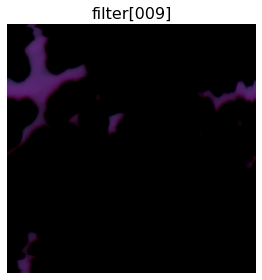

In [29]:
filter_number = 9
#Render
f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(activations[filter_number][0])
ax.set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

In [27]:
print(activations[0])

[[[[34 45  0]
   [34 44  0]
   [32 45  2]
   ...
   [34 46  0]
   [35 42  0]
   [33 46  0]]

  [[33 44  0]
   [35 46  0]
   [34 45  0]
   ...
   [33 44  1]
   [32 46  0]
   [32 45  0]]

  [[33 44  0]
   [32 44  0]
   [33 45  0]
   ...
   [34 43  0]
   [34 44  0]
   [34 43  0]]

  ...

  [[33 42  1]
   [34 45  1]
   [36 41  0]
   ...
   [32 42  0]
   [33 42  0]
   [31 44  0]]

  [[34 45  0]
   [36 42  0]
   [35 41  0]
   ...
   [33 44  0]
   [32 42  0]
   [33 41  0]]

  [[36 42  0]
   [34 41  0]
   [33 42  0]
   ...
   [31 43  0]
   [31 43  0]
   [32 43  1]]]]
